<a href="https://colab.research.google.com/github/Dana1402/NeuralNetworksScripts/blob/main/Conv_NN_Multy_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
def show_cifar(images, labels, predicted_labels=None):
  plt.figure(figsize=(10,10))
  for i in range(16):
      plt.subplot(4,4, i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      if predicted_labels is not None:
          title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
          if labels[i] != predicted_labels[i]:
              plt.setp(title_obj, color='r')
      else:
          plt.title(f"Real label: {labels[i]}")

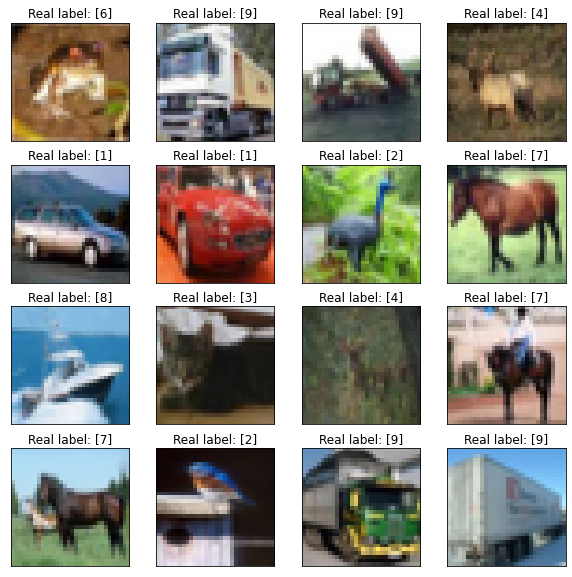

In [ ]:
show_cifar(x_train, y_train)

In [ ]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
model = models.Sequential();

model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 512, validation_data = (x_test, y_test))

Epoch 1/10
98/98 [==============================] - 60s 607ms/step - loss: 1.9827 - accuracy: 0.2902 - val_loss: 1.4725 - val_accuracy: 0.4888
Epoch 2/10
98/98 [==============================] - 62s 630ms/step - loss: 1.3161 - accuracy: 0.5388 - val_loss: 1.1158 - val_accuracy: 0.6088
Epoch 3/10
98/98 [==============================] - 61s 619ms/step - loss: 1.0636 - accuracy: 0.6322 - val_loss: 1.0825 - val_accuracy: 0.6146
Epoch 4/10
98/98 [==============================] - 61s 619ms/step - loss: 0.9350 - accuracy: 0.6784 - val_loss: 1.0146 - val_accuracy: 0.6438
Epoch 5/10
98/98 [==============================] - 61s 620ms/step - loss: 0.8422 - accuracy: 0.7095 - val_loss: 0.9965 - val_accuracy: 0.6543
Epoch 6/10
98/98 [==============================] - 62s 633ms/step - loss: 0.7740 - accuracy: 0.7313 - val_loss: 0.9191 - val_accuracy: 0.6865
Epoch 7/10
98/98 [==============================] - 61s 621ms/step - loss: 0.7115 - accuracy: 0.7534 - val_loss: 0.8555 - val_accuracy: 0.7062

#Vizialization

In [ ]:
def visualize_loss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

  plt.plot(epochs, acc_values, 'bo', label = 'Training acc', c = 'red')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc', c = 'red')

  plt.title('Training and validation loss/accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss,accuracy')
  plt.legend()

  plt.show()

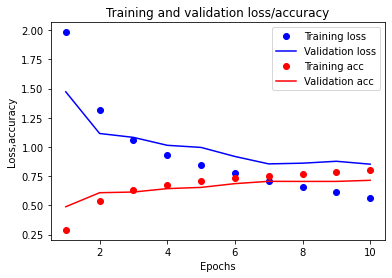

In [ ]:
visualize_loss(history)

In [ ]:
def show_cifar(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i].argmax()}")
            if labels[i] != predicted_labels[i].argmax():
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

313/313 [==============================] - 5s 15ms/step


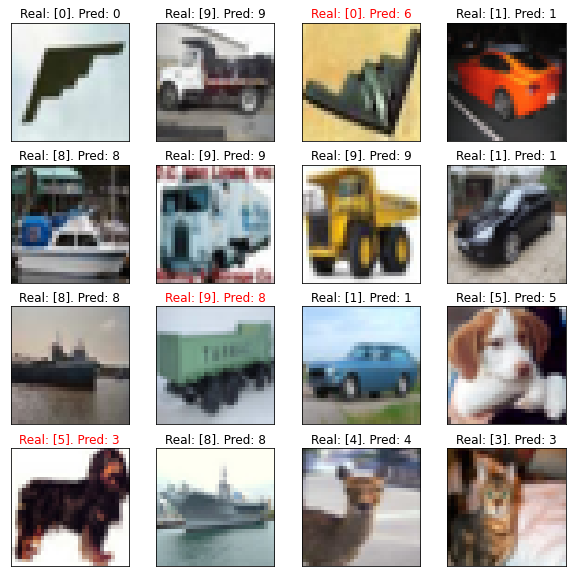

In [ ]:
predicted_labels = model.predict(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_cifar(x_test[idxs], y_test[idxs], predicted_labels[idxs])